In [2]:
import Pkg
Pkg.add("Tables")
Pkg.add("Combinatorics")
Pkg.add("Permutations")
Pkg.add("StatsBase")

   Resolving package versions...
  No Changes to `C:\Users\joyse\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\joyse\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\joyse\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\joyse\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\joyse\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\joyse\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\joyse\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\joyse\.julia\environments\v1.10\Manifest.toml`


In [3]:
using Random
using DataFrames, CSV
using Tables
using Combinatorics
using Plots
using Permutations
using Statistics
using StatsBase

In [4]:
C_long = CSV.read("redsox_2023.csv", DataFrame, header=true)
C = first(C_long,9)

Row,Player,AB (At Bats),H (Hits),Strike Out (SO),Other Out (OO),Walk (BB),Single (1B),Double (2B),Triple (3B),Home Run (HR)
,String15?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?
1,Casas (1),429,113,126,120,70,66,21,2,24
2,Devers (2),580,157,126,235,62,90,34,0,33
3,Duran (3),332,98,90,120,24,54,34,2,8
4,Hernandez (4),297,66,68,132,31,49,11,0,6
5,Turner (5),558,154,110,243,51,100,31,0,23
6,Valdez (6),139,37,37,57,8,23,8,0,6
7,Verdugo (7),546,144,93,264,45,89,37,5,13
8,Wong (8),371,87,134,128,22,51,25,2,9
9,Yoshida (9),537,155,81,267,34,104,33,3,15


In [5]:
#get the probability of Strike Out/Other Out/etc. by dividing each of those columns by the batter's total number of times at bat
probabilityData = round.(C[:,4:10]./C[:,2], digits = 3)

#adds the column of player names to the table of probability distributions (adds it to the last column)
probabilityData.NewColumn = C[:,1] 

probabilityData

Row,Strike Out (SO),Other Out (OO),Walk (BB),Single (1B),Double (2B),Triple (3B),Home Run (HR),NewColumn
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String15?
1,0.294,0.28,0.163,0.154,0.049,0.005,0.056,Casas (1)
2,0.217,0.405,0.107,0.155,0.059,0.0,0.057,Devers (2)
3,0.271,0.361,0.072,0.163,0.102,0.006,0.024,Duran (3)
4,0.229,0.444,0.104,0.165,0.037,0.0,0.02,Hernandez (4)
5,0.197,0.435,0.091,0.179,0.056,0.0,0.041,Turner (5)
6,0.266,0.41,0.058,0.165,0.058,0.0,0.043,Valdez (6)
7,0.17,0.484,0.082,0.163,0.068,0.009,0.024,Verdugo (7)
8,0.361,0.345,0.059,0.137,0.067,0.005,0.024,Wong (8)
9,0.151,0.497,0.063,0.194,0.061,0.006,0.028,Yoshida (9)


In [6]:
# Get the last column 
last_col = probabilityData[!, 8]

# Get columns 1 to 7 
subset_cols = select(probabilityData, 1:7)

# Concatenate the last column and columns 1 to 7 into a new DataFrame
newTable = hcat(last_col, subset_cols)

# Display the new DataFrame
println(newTable)

9×8 DataFrame
 Row │ x1             Strike Out (SO)  Other Out (OO)  Walk (BB)  Single (1B)  Double (2B)  Triple (3B)  Home Run (HR) 
     │ String15?      Float64          Float64         Float64    Float64      Float64      Float64      Float64       
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Casas (1)                0.294           0.28       0.163        0.154        0.049        0.005          0.056
   2 │ Devers (2)               0.217           0.405      0.107        0.155        0.059        0.0            0.057
   3 │ Duran (3)                0.271           0.361      0.072        0.163        0.102        0.006          0.024
   4 │ Hernandez (4)            0.229           0.444      0.104        0.165        0.037        0.0            0.02
   5 │ Turner (5)               0.197           0.435      0.091        0.179        0.056        0.0            0.041
   6 │ Valdez (6)               

In [7]:
## 
##
##
## 
## Problem 1 specifies how the data should be structured
## Do not change the name of the 'playersData' data frame
##
filePath = "red_sox_2023_probs.csv"
CSV.write(filePath, newTable)


playersData = CSV.read("red_sox_2023_probs.csv", DataFrame) ## Do not change the name of the 'playersData' data frame

Row,x1,Strike Out (SO),Other Out (OO),Walk (BB),Single (1B),Double (2B),Triple (3B),Home Run (HR)
,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,Casas (1),0.294,0.28,0.163,0.154,0.049,0.005,0.056
2,Devers (2),0.217,0.405,0.107,0.155,0.059,0.0,0.057
3,Duran (3),0.271,0.361,0.072,0.163,0.102,0.006,0.024
4,Hernandez (4),0.229,0.444,0.104,0.165,0.037,0.0,0.02
5,Turner (5),0.197,0.435,0.091,0.179,0.056,0.0,0.041
6,Valdez (6),0.266,0.41,0.058,0.165,0.058,0.0,0.043
7,Verdugo (7),0.17,0.484,0.082,0.163,0.068,0.009,0.024
8,Wong (8),0.361,0.345,0.059,0.137,0.067,0.005,0.024
9,Yoshida (9),0.151,0.497,0.063,0.194,0.061,0.006,0.028


In [8]:
## Function to check if the probabilities in each row sum to 1
function check_probabilities(playersData)
    for i in 1:nrow(playersData)
        row = playersData[i, :]
        probability_sum = sum(row[2:8])  # Adjust the indices as per your data structure
        if probability_sum < 0.99 || probability_sum > 1.01  # Checking if sum ~= 1
            println("Error: Probabilities in row ", i, " do not sum to 1. Sum is: ", probability_sum)
        else
            println("Row ", i, ": ", "Good")
        end
    end
end

# Call the function to check the probabilities
check_probabilities(playersData)

Row 1: Good
Row 2: Good
Row 3: Good
Row 4: Good
Row 5: Good
Row 6: Good
Row 7: Good
Row 8: Good
Row 9: Good


In [9]:
# at_bat(index) : returns the outcome for a single player's at bat
function at_bat(index)
    # Retrieve the player's data from the dataset using the index
    playersInfo = playersData[index, 1:8]
    # Extract the probabilities for each outcome for the player
    playerSO = playersInfo[2] # Strikeout probability
    playerOO = playersInfo[3] # Other out probability
    playerBB = playersInfo[4] # Walk probability
    player1B = playersInfo[5] # Single probability
    player2B = playersInfo[6] # Double probability
    player3B = playersInfo[7] # Triple probability
    playerHR = 1 - (playerSO + playerOO + playerBB + player1B + player2B + player3B) # Home run probability

    # Create a list of outcomes and their corresponding probabilities
    outcomes = ["SO", "OO", "BB", "1B", "2B", "3B", "HR"]
    probabilities = [playerSO, playerOO, playerBB, player1B, player2B, player3B, playerHR]

    # Randomly select an outcome based on the probabilities
    outcome = outcomes[StatsBase.sample(1:length(outcomes), Weights(probabilities))]

    return outcome
end

# BB_bases: Function to update the bases when a player gets a walk (BB)
function BB_bases(bases::Vector{Int64})
    # Check the status of the bases and update them if a walk occurs
    # The following checks and updates are performed according to baseball rules
    if bases[1:3] == [0,0,0]
        bases[1] = 1
    elseif bases[1:3] == [0,0,1]
        bases[1] = 1
        bases[3] = 1
    elseif bases[1:3] == [1,0,0] || bases[1:3] == [0,1,0] 
        bases[1] = 1
        bases[2] = 1
    elseif bases[1:3] == [1,1,0] || bases[1:3] ==  [1,0,1] || bases[1:3] == [0,1,1] 
        bases[1] = 1
        bases[2] = 1       
        bases[3] = 1
    elseif bases[1:3] == [1,1,1]
        bases[1] = 1
        bases[2] = 1       
        bases[3] = 1
        bases[4] += 1 # Increment the score because the bases were loaded
    end
    
    return bases
end

# single_bases: Function to update the bases when a player hits a single (1B)
function single_bases(bases::Vector{Int64})
    # Add runs for players on second and third base
    bases[4] += bases[2] + bases[3]
    # Clear second and third base
    bases[2] = 0
    bases[3] = 0
    # If there was a player on first, move him to second
    if bases[1] == 1
        bases[2] = 1
    end
    # The hitter takes first base
    bases[1] = 1
    
    return bases
end

# double_bases: Function to update the bases when a player hits a double (2B)
function double_bases(bases::Vector{Int64})
    # Add runs for players on second and third base
    bases[4] += bases[2] + bases[3]
    # The hitter takes second base
    bases[2] = 1
    # Clear third base
    bases[3] = 0
    # If there was a player on first, move him to third
    if bases[1] == 1
        bases[3] = 1
        bases[1] = 0
    end
    
    return bases
end

# triple_bases: Function to update the bases when a player hits a triple (3B)
function triple_bases(bases::Vector{Int64})
    # Add runs for players on all bases
    bases[4] += bases[1] + bases[2] + bases[3]
    # The hitter takes third base
    bases[3] = 1
    # Clear first and second base
    bases[2] = 0
    bases[1] = 0
    
    return bases
end

# HR_bases: Function to update the bases when a player hits a home run (HR)
function HR_bases(bases::Vector{Int64})
    # Add runs for all players and the hitter
    bases[4] += bases[1] + bases[2] + bases[3] + 1
    # Clear all bases
    bases[3] = 0
    bases[2] = 0
    bases[1] = 0
    
    return bases
end

## game_outcome(lineup) : returns the number of runs scored from a given lineup, simulating a game
function game_outcome(lineup)
    # Initialize game variables
    inning = 0 # Inning counter
    runs = 0 # Total runs scored
    current_position = 0 # Current position in the batting lineup
    bases = [0, 0, 0, 0] # Bases array, where the 4th index holds the score
    sequence = [] # To record the sequence of plays

    # Loop through each inning
    while inning < 9
        inning += 1 # Increment inning
        outs = 0 # Reset outs at the start of each inning
        bases = [0,0,0,bases[4]] # Reset bases but keep the score
        
        # Loop until there are 3 outs
        while outs < 3
            current_position += 1 # Move to the next player in the lineup
            
            # Reset the lineup if we've gone through all players
            if current_position == 10
                current_position = 1
            end

            # Determine the outcome of the current player's at bat
            outcome = at_bat(lineup[current_position])
            # Record the outcome in the sequence
            push!(sequence,outcome)

            # Handle the outcome to update the number of outs or the bases
            if outcome == "SO" || outcome == "OO"
                outs += 1 # Increment outs for a strikeout or other out
            elseif outcome == "BB"
                bases = BB_bases(bases) # Update bases for a walk
            elseif outcome == "1B"
                bases = single_bases(bases) # Update bases for a single
            elseif outcome == "2B"
                bases = double_bases(bases) # Update bases for a double
            elseif outcome == "3B"
                bases = triple_bases(bases) # Update bases for a triple
            elseif outcome == "HR"
                bases = HR_bases(bases) # Update bases for a home run
            end
        end
    end

    # Return the total score and the sequence of at-bat outcomes
    return bases[4], sequence
end

# average_score: Calculates the average score from simulating a number of games
function average_score(lineup, num_games)
    total_score = 0 # Sum of scores from all games
    score_square_sum = 0 # Sum of squares of scores for variance calculation
    max_score = -Inf # Track the maximum score
    min_score = Inf # Track the minimum score

    # Simulate each game and update scoring statistics
    for game in 1:num_games
        # Obtain the score for the current game
        score = game_outcome(lineup)[1]
        # Aggregate the total score
        total_score += score
        # Aggregate the square of the score
        score_square_sum += score^2
        # Update the maximum score if the current score is higher
        max_score = max(max_score, score)
        # Update the minimum score if the current score is lower
        min_score = min(min_score, score)
    end

    # Calculate the average score
    avg_score = total_score / num_games
    # Calculate the variance
    variance = (score_square_sum / num_games) - avg_score^2
    # Calculate the standard deviation
    std_dev = sqrt(variance)

    # Return the average score, standard deviation, max score, and min score
    return avg_score, std_dev, max_score, min_score
end


average_score (generic function with 1 method)

In [10]:
# Function to find the best lineup by permuting a subset of players and evaluating performance
function find_best_lineup(lineup, num_games, i)
    # Initialize an empty DataFrame to store lineup permutations and their scores
    lineups_df = DataFrame(Lineup = String[], Score = Float64[], Std = Float64[], Max = Float64[], Min = Float64[])
    # Determine the range of positions in the lineup to permute based on input 'i'
    positions_to_permute = i:min(i+3, length(lineup))

    # Iterate over all permutations of the specified lineup subset
    for perm in permutations(lineup[positions_to_permute])
        # Create a copy of the current lineup to test a new permutation
        potential_lineup = copy(lineup)
        # Apply the permutation to the specified positions in the lineup
        potential_lineup[positions_to_permute] = perm
        
        # Calculate the performance of the lineup permutation
        results = average_score(potential_lineup, num_games)
        # Output the potential lineup and its results to the console
        println("Testing lineup: ", potential_lineup, " Results: ", results)
        
        # Add the lineup permutation and its results to the DataFrame
        push!(lineups_df, [join(potential_lineup, "-"), results[1], results[2], results[3], results[4]])
    end
    
    # Return the DataFrame containing all tested lineups and their scores
    return lineups_df
end

# Function to find and evaluate lineup permutations, storing the data in a structured DataFrame
function find_lineup(lineup, num_games, i)
    # Generate column names for the DataFrame based on lineup positions and statistics
    column_names = [Symbol("Position_$j") for j in 1:length(lineup)]
    append!(column_names, [:Average_Runs, :Std, :Max, :Min])

    # Initialize an empty DataFrame with the generated column names
    lineups_df = DataFrame()
    for col in column_names
        lineups_df[!, col] = Vector{Float64}()
    end

    # Determine the range of positions in the lineup to permute based on input 'i'
    positions_to_permute = i:min(i+3, length(lineup))

    # Iterate over all permutations of the specified lineup subset
    for perm in permutations(lineup[positions_to_permute])
        # Create a copy of the current lineup to test a new permutation
        potential_lineup = copy(lineup)
        # Apply the permutation to the specified positions in the lineup
        potential_lineup[positions_to_permute] = perm

        # Calculate the performance of the lineup permutation
        results = average_score(potential_lineup, num_games)
        # Output the potential lineup and its results to the console
        println("Testing lineup: ", potential_lineup, " Results: ", results)

        # Create a row combining the lineup and its performance statistics
        lineup_row = Any[player for player in potential_lineup]
        append!(lineup_row, results)
        # Add the combined row to the DataFrame
        push!(lineups_df, lineup_row)
    end

    # Return the DataFrame containing all tested lineups and their scores
    return lineups_df
end


find_lineup (generic function with 1 method)

# Your Work Below

## 2a

In [11]:
using Random

# Set a specific seed
seed_value = 123
Random.seed!(seed_value)

TaskLocalRNG()

In [12]:
using Random

# Create a list of numbers from 1 to 9
numbers = collect(1:9)

# Shuffle the list
b = shuffle(numbers)

# Display the shuffled list
println(b)

[8, 9, 3, 4, 1, 6, 5, 7, 2]


In [13]:
average_score(b, 162)

(6.179012345679013, 3.9124750162696245, 20.0, 0.0)

## 2c

In [14]:
# Define the number of simulations
num_simulations = 1000

# Define the list to store the results
simulations = []

# Run the function 1,000 times and store the first index it returns
for i in 1:num_simulations
    # Run the function
    result = average_score(b, 162)
    
    # Store the first index in the simulations list
    push!(simulations, result[1])
end

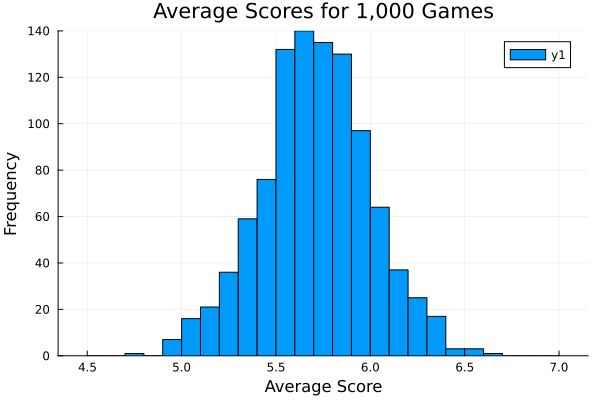

In [15]:
using Plots

# Create histogram with bin size 0.1
histogram(simulations, bins=4.5:0.1:7, xlabel="Average Score", ylabel="Frequency", title="Average Scores for 1,000 Games")

## 2d

In [16]:
# Define the number of trials
num_trials = 10

# Define the list to store the results
ten_trials_162 = []

# Run the command 10 times and store the first index it returns
for i in 1:num_trials
    # Run the function
    result = average_score(b, 162)
    
    # Store the first index in the ten_trials list
    push!(ten_trials_162, result[1])
end

# Display the ten_trials list
println(ten_trials_162)

Any[5.790123456790123, 5.993827160493828, 5.777777777777778, 5.944444444444445, 5.481481481481482, 5.462962962962963, 5.487654320987654, 5.95679012345679, 6.08641975308642, 6.012345679012346]


In [17]:
using Statistics

# Compute the standard deviation of ten_trials
std_dev = std(ten_trials_162)

# Display the standard deviation
println("Standard deviation of ten trials with 162 games:", std_dev)

Standard deviation of ten trials with 162 games:0.24114050028193418


In [18]:
# Define the number of trials
num_trials = 10

# Define the list to store the results
ten_trials_16200 = []

# Run the command 10 times and store the first index it returns
for i in 1:num_trials
    # Run the function
    result = average_score(b, 16200)
    
    # Store the first index in the ten_trials list
    push!(ten_trials_16200, result[1])
end

# Display the ten_trials list
println(ten_trials_16200)

Any[5.755740740740741, 5.7098148148148145, 5.671111111111111, 5.796913580246914, 5.7179012345679014, 5.715185185185185, 5.683827160493827, 5.744135802469136, 5.736851851851852, 5.7169135802469135]


In [19]:
using Statistics

# Compute the standard deviation of ten_trials
std_dev = std(ten_trials_16200)

# Display the standard deviation
println("Standard deviation of ten trials with 16,200 games:", std_dev)

Standard deviation of ten trials with 16,200 games:0.036001330320651295


## 4b

In [20]:
function get_best_lineup(df::DataFrame)
    # find the row index w the ma average runs
    
    # print(df)
    # print(df[!, 10])
    max_runs_idx = argmax(df[!,10])
    # print(max_runs_idx) 

    # extract the lineup from this row and convert it to a vector
    best_lineup = convert(Vector{Int64}, collect(values(df[max_runs_idx, 1:9])))
    # println(best_lineup)

    return [best_lineup, max_runs_idx]
end

get_best_lineup (generic function with 1 method)

In [21]:
b = [1,2,3,5,9,7,4,6,8] # best lineup from problem 3
set_of_lineups = [b]
set_of_avg_runs = [average_score(b, 162)[1]]

for trial in 1:15
    best_lineup = set_of_lineups[trial]
    best_avg_num_runs =  set_of_avg_runs[trial]

    for i in 1:6
        table = find_lineup(best_lineup, 162, i)
        lineup = get_best_lineup(table)[1]
        index = get_best_lineup(table)[2]
        if table[index,10] > best_avg_num_runs
            best_lineup = lineup
            best_avg_num_runs = table[index,10]
        end
        println(best_lineup)
        println("-------- table break --------")
    end
    
    println("=============== trial break =====================")
    push!(set_of_lineups, best_lineup)
    push!(set_of_avg_runs, best_avg_num_runs)
end


for k in 1:length(set_of_lineups)
    println("For trial ", k, " the best lineup is ", set_of_lineups[k], " with ", set_of_avg_runs[k], " average number of runs per game.")
end

println("The original lineup was b = ", b, " with an original average number of ", average_score(b, 162)[1], " runs per game.")


Testing lineup: [1, 2, 3, 5, 9, 7, 4, 6, 8] Results: (5.981481481481482, 3.7834470895318058, 19.0, 0.0)
Testing lineup: [1, 2, 5, 3, 9, 7, 4, 6, 8] Results: (6.148148148148148, 3.5315547973511756, 18.0, 0.0)
Testing lineup: [1, 3, 2, 5, 9, 7, 4, 6, 8] Results: (5.691358024691358, 3.6604053452550036, 17.0, 0.0)
Testing lineup: [1, 3, 5, 2, 9, 7, 4, 6, 8] Results: (6.172839506172839, 3.824192397455997, 21.0, 0.0)
Testing lineup: [1, 5, 2, 3, 9, 7, 4, 6, 8] Results: (5.555555555555555, 3.524167006034157, 19.0, 0.0)
Testing lineup: [1, 5, 3, 2, 9, 7, 4, 6, 8] Results: (5.790123456790123, 3.2837649627276058, 18.0, 0.0)
Testing lineup: [2, 1, 3, 5, 9, 7, 4, 6, 8] Results: (6.055555555555555, 3.46632833106811, 23.0, 0.0)
Testing lineup: [2, 1, 5, 3, 9, 7, 4, 6, 8] Results: (5.95679012345679, 3.5907094890793076, 15.0, 0.0)
Testing lineup: [2, 3, 1, 5, 9, 7, 4, 6, 8] Results: (5.993827160493828, 3.8594071597134563, 24.0, 0.0)
Testing lineup: [2, 3, 5, 1, 9, 7, 4, 6, 8] Results: (5.9629629629629

Testing lineup: [3, 2, 9, 5, 7, 1, 4, 6, 8] Results: (5.8580246913580245, 3.7331800298395486, 17.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 4, 1, 6, 8] Results: (5.839506172839506, 3.7678195224380904, 17.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 7, 4, 6, 8] Results: (6.506172839506172, 4.19912823636468, 24.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 4, 7, 6, 8] Results: (6.0, 3.9267993437938427, 19.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 7, 1, 6, 8] Results: (5.87037037037037, 3.593785598022535, 18.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 1, 7, 6, 8] Results: (5.450617283950617, 3.7185761066483276, 16.0, 0.0)
Testing lineup: [3, 2, 9, 1, 7, 5, 4, 6, 8] Results: (6.148148148148148, 3.821999706414157, 19.0, 0.0)
Testing lineup: [3, 2, 9, 1, 7, 4, 5, 6, 8] Results: (5.549382716049383, 3.579869073293531, 18.0, 0.0)
Testing lineup: [3, 2, 9, 1, 5, 7, 4, 6, 8] Results: (5.882716049382716, 3.611343244622859, 17.0, 0.0)
Testing lineup: [3, 2, 9, 1, 5, 4, 7, 6, 8] Results: (6.395061728395062, 3.802789789

Testing lineup: [9, 3, 7, 2, 5, 1, 4, 6, 8] Results: (5.777777777777778, 3.569417423157558, 20.0, 0.0)
Testing lineup: [9, 2, 3, 7, 5, 1, 4, 6, 8] Results: (5.6419753086419755, 3.7311125735398782, 20.0, 0.0)
Testing lineup: [9, 2, 7, 3, 5, 1, 4, 6, 8] Results: (5.765432098765432, 3.6591559606219097, 19.0, 0.0)
Testing lineup: [9, 7, 3, 2, 5, 1, 4, 6, 8] Results: (6.302469135802469, 3.5782082318224533, 16.0, 0.0)
Testing lineup: [9, 7, 2, 3, 5, 1, 4, 6, 8] Results: (6.111111111111111, 3.5866694203486604, 17.0, 0.0)
Testing lineup: [7, 3, 2, 9, 5, 1, 4, 6, 8] Results: (6.253086419753086, 3.844688059710728, 24.0, 0.0)
Testing lineup: [7, 3, 9, 2, 5, 1, 4, 6, 8] Results: (6.302469135802469, 3.7909728810491212, 20.0, 0.0)
Testing lineup: [7, 2, 3, 9, 5, 1, 4, 6, 8] Results: (5.839506172839506, 3.8903387459967895, 20.0, 0.0)
Testing lineup: [7, 2, 9, 3, 5, 1, 4, 6, 8] Results: (5.2407407407407405, 3.38625682040986, 16.0, 0.0)
Testing lineup: [7, 9, 3, 2, 5, 1, 4, 6, 8] Results: (5.6481481481

Testing lineup: [3, 2, 9, 4, 5, 7, 1, 6, 8] Results: (5.925925925925926, 3.249986810145231, 18.0, 0.0)
Testing lineup: [3, 2, 9, 4, 5, 1, 7, 6, 8] Results: (5.709876543209877, 3.502524836695952, 22.0, 0.0)
Testing lineup: [3, 2, 9, 4, 1, 7, 5, 6, 8] Results: (5.790123456790123, 3.6488322142801115, 17.0, 0.0)
Testing lineup: [3, 2, 9, 4, 1, 5, 7, 6, 8] Results: (5.87037037037037, 3.4303275027912474, 23.0, 0.0)
[3, 2, 9, 7, 5, 1, 4, 6, 8]
-------- table break --------
Testing lineup: [3, 2, 9, 7, 5, 1, 4, 6, 8] Results: (5.944444444444445, 3.6654038229348185, 19.0, 0.0)
Testing lineup: [3, 2, 9, 7, 5, 1, 6, 4, 8] Results: (5.8765432098765435, 3.8357728664117747, 19.0, 0.0)
Testing lineup: [3, 2, 9, 7, 5, 4, 1, 6, 8] Results: (5.820987654320987, 3.5796136093774398, 19.0, 0.0)
Testing lineup: [3, 2, 9, 7, 5, 4, 6, 1, 8] Results: (6.006172839506172, 3.5668170850598244, 19.0, 0.0)
Testing lineup: [3, 2, 9, 7, 5, 6, 1, 4, 8] Results: (5.679012345679013, 3.894685078930659, 18.0, 0.0)
Testing l

Testing lineup: [3, 2, 9, 5, 7, 1, 4, 6, 8] Results: (5.783950617283951, 3.7985038246924687, 20.0, 0.0)
Testing lineup: [3, 2, 7, 9, 5, 1, 4, 6, 8] Results: (5.969135802469136, 3.609696884620873, 18.0, 0.0)
Testing lineup: [3, 2, 7, 5, 9, 1, 4, 6, 8] Results: (5.666666666666667, 3.1933573029333133, 16.0, 0.0)
Testing lineup: [3, 2, 5, 9, 7, 1, 4, 6, 8] Results: (5.537037037037037, 3.277568522301455, 20.0, 0.0)
Testing lineup: [3, 2, 5, 7, 9, 1, 4, 6, 8] Results: (5.660493827160494, 3.6820612521761116, 18.0, 0.0)
Testing lineup: [3, 9, 2, 7, 5, 1, 4, 6, 8] Results: (5.808641975308642, 3.409380579159024, 17.0, 0.0)
Testing lineup: [3, 9, 2, 5, 7, 1, 4, 6, 8] Results: (5.419753086419753, 3.3788163517767114, 15.0, 0.0)
Testing lineup: [3, 9, 7, 2, 5, 1, 4, 6, 8] Results: (6.1234567901234565, 3.4903136370776124, 16.0, 0.0)
Testing lineup: [3, 9, 7, 5, 2, 1, 4, 6, 8] Results: (5.691358024691358, 3.3560042941622705, 16.0, 0.0)
Testing lineup: [3, 9, 5, 2, 7, 1, 4, 6, 8] Results: (5.8271604938

Testing lineup: [3, 2, 9, 5, 4, 7, 1, 6, 8] Results: (5.969135802469136, 3.8720633468222854, 19.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 7, 6, 1, 8] Results: (5.895061728395062, 3.6525114388601745, 19.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 6, 1, 7, 8] Results: (6.2407407407407405, 3.6915076975312937, 17.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 6, 7, 1, 8] Results: (5.598765432098766, 3.411056598448258, 16.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 1, 4, 6, 8] Results: (5.3765432098765435, 3.569444110849556, 16.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 1, 6, 4, 8] Results: (6.518518518518518, 3.732113263306849, 19.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 4, 1, 6, 8] Results: (5.567901234567901, 3.481656593091958, 15.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 4, 6, 1, 8] Results: (5.8765432098765435, 3.7097892391280385, 22.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 6, 1, 4, 8] Results: (5.5246913580246915, 3.820349375277682, 19.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 6, 4, 1, 8] Results: (5.790123456

Testing lineup: [3, 5, 2, 1, 9, 4, 7, 6, 8] Results: (5.722222222222222, 3.7519542233117873, 18.0, 0.0)
Testing lineup: [3, 5, 9, 2, 1, 4, 7, 6, 8] Results: (5.462962962962963, 3.567927933600818, 19.0, 0.0)
Testing lineup: [3, 5, 9, 1, 2, 4, 7, 6, 8] Results: (5.6419753086419755, 3.4022818848651695, 18.0, 0.0)
Testing lineup: [3, 5, 1, 2, 9, 4, 7, 6, 8] Results: (5.925925925925926, 3.5268906243310862, 19.0, 0.0)
Testing lineup: [3, 5, 1, 9, 2, 4, 7, 6, 8] Results: (6.302469135802469, 3.534817134587492, 19.0, 0.0)
Testing lineup: [3, 1, 2, 9, 5, 4, 7, 6, 8] Results: (6.006172839506172, 3.7687750794861907, 20.0, 0.0)
Testing lineup: [3, 1, 2, 5, 9, 4, 7, 6, 8] Results: (5.814814814814815, 3.3595675467995747, 18.0, 0.0)
Testing lineup: [3, 1, 9, 2, 5, 4, 7, 6, 8] Results: (5.907407407407407, 3.476207589369423, 21.0, 0.0)
Testing lineup: [3, 1, 9, 5, 2, 4, 7, 6, 8] Results: (5.598765432098766, 3.597770016708412, 19.0, 0.0)
Testing lineup: [3, 1, 5, 2, 9, 4, 7, 6, 8] Results: (6.12962962962

Testing lineup: [3, 2, 9, 5, 6, 4, 1, 7, 8] Results: (6.41358024691358, 3.938798873330306, 20.0, 0.0)
Testing lineup: [3, 2, 9, 5, 6, 4, 7, 1, 8] Results: (5.746913580246914, 3.7156853519245856, 19.0, 0.0)
Testing lineup: [3, 2, 9, 5, 6, 7, 1, 4, 8] Results: (5.771604938271605, 3.6536379491787794, 21.0, 0.0)
Testing lineup: [3, 2, 9, 5, 6, 7, 4, 1, 8] Results: (5.907407407407407, 3.504504254325725, 21.0, 0.0)
[3, 2, 9, 5, 1, 4, 7, 6, 8]
-------- table break --------
Testing lineup: [3, 2, 9, 5, 1, 4, 7, 6, 8] Results: (6.0246913580246915, 4.146917071878389, 19.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 4, 7, 8, 6] Results: (5.783950617283951, 2.9117029419658698, 14.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 4, 6, 7, 8] Results: (5.8580246913580245, 3.3644240494586186, 16.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 4, 6, 8, 7] Results: (5.604938271604938, 3.307973951356974, 15.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 4, 8, 7, 6] Results: (5.709876543209877, 3.173349865280296, 15.0, 0.0)
Testing li

Testing lineup: [3, 2, 9, 5, 4, 1, 7, 6, 8] Results: (5.734567901234568, 3.334801917001418, 19.0, 0.0)
Testing lineup: [3, 2, 9, 1, 5, 4, 7, 6, 8] Results: (5.691358024691358, 3.5854368513513366, 17.0, 0.0)
Testing lineup: [3, 2, 9, 1, 4, 5, 7, 6, 8] Results: (5.432098765432099, 3.8230563418179604, 21.0, 0.0)
Testing lineup: [3, 2, 9, 4, 5, 1, 7, 6, 8] Results: (5.537037037037037, 3.424924778643904, 17.0, 0.0)
Testing lineup: [3, 2, 9, 4, 1, 5, 7, 6, 8] Results: (5.432098765432099, 3.362605807614964, 20.0, 0.0)
Testing lineup: [3, 2, 5, 9, 1, 4, 7, 6, 8] Results: (6.0246913580246915, 3.8903975125910595, 21.0, 0.0)
Testing lineup: [3, 2, 5, 9, 4, 1, 7, 6, 8] Results: (5.987654320987654, 3.7744881990087924, 25.0, 0.0)
Testing lineup: [3, 2, 5, 1, 9, 4, 7, 6, 8] Results: (5.555555555555555, 3.8361503336960157, 19.0, 0.0)
Testing lineup: [3, 2, 5, 1, 4, 9, 7, 6, 8] Results: (5.419753086419753, 3.1323252812293845, 14.0, 0.0)
Testing lineup: [3, 2, 5, 4, 9, 1, 7, 6, 8] Results: (5.7654320987

Testing lineup: [3, 2, 9, 5, 1, 7, 6, 4, 8] Results: (5.648148148148148, 3.4092688152440163, 20.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 7, 6, 8, 4] Results: (5.839506172839506, 3.1228223627387384, 16.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 7, 8, 4, 6] Results: (5.54320987654321, 3.2680623727219804, 15.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 7, 8, 6, 4] Results: (5.938271604938271, 3.3530736922247955, 15.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 6, 4, 7, 8] Results: (5.685185185185185, 3.4968631837977697, 18.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 6, 4, 8, 7] Results: (6.283950617283951, 4.134272796165838, 24.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 6, 7, 4, 8] Results: (5.938271604938271, 3.759254191243113, 19.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 6, 7, 8, 4] Results: (5.111111111111111, 2.933417507209797, 14.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 6, 8, 4, 7] Results: (5.6419753086419755, 3.865991773717588, 20.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 6, 8, 7, 4] Results: (5.790123456790

Testing lineup: [3, 2, 1, 9, 4, 5, 7, 6, 8] Results: (6.191358024691358, 3.325052585896772, 19.0, 0.0)
Testing lineup: [3, 2, 1, 5, 9, 4, 7, 6, 8] Results: (5.901234567901234, 3.7436528615039935, 23.0, 1.0)
Testing lineup: [3, 2, 1, 5, 4, 9, 7, 6, 8] Results: (5.666666666666667, 3.3259176771323924, 18.0, 0.0)
Testing lineup: [3, 2, 1, 4, 9, 5, 7, 6, 8] Results: (6.462962962962963, 3.9785518937758955, 18.0, 0.0)
Testing lineup: [3, 2, 1, 4, 5, 9, 7, 6, 8] Results: (5.685185185185185, 3.223126735541246, 18.0, 0.0)
Testing lineup: [3, 2, 4, 9, 5, 1, 7, 6, 8] Results: (6.055555555555555, 3.450263901160942, 18.0, 0.0)
Testing lineup: [3, 2, 4, 9, 1, 5, 7, 6, 8] Results: (6.049382716049383, 4.028911670487472, 19.0, 0.0)
Testing lineup: [3, 2, 4, 5, 9, 1, 7, 6, 8] Results: (5.54320987654321, 3.3427621561360072, 15.0, 0.0)
Testing lineup: [3, 2, 4, 5, 1, 9, 7, 6, 8] Results: (5.580246913580247, 3.340230632722002, 18.0, 0.0)
Testing lineup: [3, 2, 4, 1, 9, 5, 7, 6, 8] Results: (5.93827160493827

Testing lineup: [3, 2, 9, 5, 1, 8, 7, 4, 6] Results: (6.08641975308642, 3.650460924268306, 18.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 8, 7, 6, 4] Results: (6.061728395061729, 3.3549141366810513, 18.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 8, 6, 4, 7] Results: (5.561728395061729, 3.6530747374426746, 17.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 8, 6, 7, 4] Results: (5.697530864197531, 3.705334003326542, 19.0, 0.0)
[3, 2, 9, 5, 1, 4, 7, 6, 8]
-------- table break --------
=============== trial break =====================
Testing lineup: [3, 2, 9, 5, 1, 4, 7, 6, 8] Results: (5.654320987654321, 3.760287925104004, 21.0, 0.0)
Testing lineup: [3, 2, 5, 9, 1, 4, 7, 6, 8] Results: (5.635802469135802, 3.4938326135280047, 16.0, 0.0)
Testing lineup: [3, 9, 2, 5, 1, 4, 7, 6, 8] Results: (6.5246913580246915, 3.7878959554002614, 17.0, 0.0)
Testing lineup: [3, 9, 5, 2, 1, 4, 7, 6, 8] Results: (5.679012345679013, 3.8194665793098475, 17.0, 0.0)
Testing lineup: [3, 5, 2, 9, 1, 4, 7, 6, 8] Results: (5.4320987

Testing lineup: [3, 2, 9, 5, 4, 1, 7, 6, 8] Results: (6.018518518518518, 3.857767892688024, 18.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 7, 1, 6, 8] Results: (5.746913580246914, 3.717346273017793, 19.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 1, 4, 6, 8] Results: (5.493827160493828, 3.747010188515979, 20.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 4, 1, 6, 8] Results: (6.296296296296297, 3.8520299104143803, 19.0, 0.0)
Testing lineup: [3, 2, 9, 1, 5, 4, 7, 6, 8] Results: (5.611111111111111, 3.387066905483597, 17.0, 0.0)
Testing lineup: [3, 2, 9, 1, 5, 7, 4, 6, 8] Results: (5.604938271604938, 3.2704400441850883, 16.0, 0.0)
Testing lineup: [3, 2, 9, 1, 4, 5, 7, 6, 8] Results: (5.845679012345679, 3.4952719169629898, 16.0, 0.0)
Testing lineup: [3, 2, 9, 1, 4, 7, 5, 6, 8] Results: (6.216049382716049, 3.5219227629490444, 15.0, 0.0)
Testing lineup: [3, 2, 9, 1, 7, 5, 4, 6, 8] Results: (5.895061728395062, 3.5825503445866946, 17.0, 0.0)
Testing lineup: [3, 2, 9, 1, 7, 4, 5, 6, 8] Results: (5.944444444444

Testing lineup: [2, 9, 5, 3, 1, 4, 7, 6, 8] Results: (5.58641975308642, 3.790249123263527, 16.0, 0.0)
Testing lineup: [2, 5, 3, 9, 1, 4, 7, 6, 8] Results: (5.6419753086419755, 3.5531541959407105, 16.0, 0.0)
Testing lineup: [2, 5, 9, 3, 1, 4, 7, 6, 8] Results: (5.574074074074074, 3.4655367737647076, 19.0, 0.0)
Testing lineup: [9, 3, 2, 5, 1, 4, 7, 6, 8] Results: (5.981481481481482, 3.7752805835096503, 20.0, 0.0)
Testing lineup: [9, 3, 5, 2, 1, 4, 7, 6, 8] Results: (6.432098765432099, 3.4638816149079408, 20.0, 0.0)
Testing lineup: [9, 2, 3, 5, 1, 4, 7, 6, 8] Results: (6.555555555555555, 4.004626953542245, 19.0, 0.0)
Testing lineup: [9, 2, 5, 3, 1, 4, 7, 6, 8] Results: (5.907407407407407, 4.082188888080735, 22.0, 0.0)
Testing lineup: [9, 5, 3, 2, 1, 4, 7, 6, 8] Results: (5.814814814814815, 3.52805724566218, 18.0, 0.0)
Testing lineup: [9, 5, 2, 3, 1, 4, 7, 6, 8] Results: (5.308641975308642, 3.809157177471484, 21.0, 0.0)
Testing lineup: [5, 3, 2, 9, 1, 4, 7, 6, 8] Results: (5.63580246913580

Testing lineup: [3, 2, 9, 4, 7, 5, 1, 6, 8] Results: (6.030864197530864, 3.5891173637390987, 16.0, 0.0)
Testing lineup: [3, 2, 9, 4, 7, 1, 5, 6, 8] Results: (5.462962962962963, 3.5349033704097814, 19.0, 0.0)
Testing lineup: [3, 2, 9, 7, 5, 1, 4, 6, 8] Results: (6.018518518518518, 3.8256319129795653, 18.0, 0.0)
Testing lineup: [3, 2, 9, 7, 5, 4, 1, 6, 8] Results: (5.901234567901234, 3.550708287094229, 19.0, 0.0)
Testing lineup: [3, 2, 9, 7, 1, 5, 4, 6, 8] Results: (5.574074074074074, 3.525577713898142, 15.0, 0.0)
Testing lineup: [3, 2, 9, 7, 1, 4, 5, 6, 8] Results: (6.2592592592592595, 3.642268245176578, 18.0, 0.0)
Testing lineup: [3, 2, 9, 7, 4, 5, 1, 6, 8] Results: (6.191358024691358, 4.081778162833418, 21.0, 0.0)
Testing lineup: [3, 2, 9, 7, 4, 1, 5, 6, 8] Results: (5.950617283950617, 3.8758550934445783, 18.0, 0.0)
[3, 2, 9, 5, 1, 4, 7, 6, 8]
-------- table break --------
Testing lineup: [3, 2, 9, 5, 1, 4, 7, 6, 8] Results: (5.54320987654321, 3.496203876856216, 17.0, 0.0)
Testing lin

Testing lineup: [5, 9, 3, 2, 1, 4, 7, 6, 8] Results: (5.679012345679013, 3.3419413316282367, 15.0, 0.0)
Testing lineup: [5, 9, 2, 3, 1, 4, 7, 6, 8] Results: (6.246913580246914, 4.090129232760228, 17.0, 0.0)
[3, 2, 9, 5, 1, 4, 7, 6, 8]
-------- table break --------
Testing lineup: [3, 2, 9, 5, 1, 4, 7, 6, 8] Results: (5.734567901234568, 3.851876582699968, 21.0, 0.0)
Testing lineup: [3, 2, 9, 1, 5, 4, 7, 6, 8] Results: (5.777777777777778, 4.026149095998543, 19.0, 0.0)
Testing lineup: [3, 2, 5, 9, 1, 4, 7, 6, 8] Results: (6.209876543209877, 3.642059007198938, 18.0, 0.0)
Testing lineup: [3, 2, 5, 1, 9, 4, 7, 6, 8] Results: (5.703703703703703, 3.364463688644672, 16.0, 0.0)
Testing lineup: [3, 2, 1, 9, 5, 4, 7, 6, 8] Results: (5.537037037037037, 3.5418814991729763, 17.0, 0.0)
Testing lineup: [3, 2, 1, 5, 9, 4, 7, 6, 8] Results: (5.62962962962963, 3.877584982295623, 18.0, 0.0)
Testing lineup: [3, 9, 2, 5, 1, 4, 7, 6, 8] Results: (6.228395061728395, 3.6738560684691333, 18.0, 0.0)
Testing lineu

Testing lineup: [3, 2, 9, 5, 4, 1, 7, 6, 8] Results: (6.314814814814815, 3.8013516475620217, 17.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 1, 6, 7, 8] Results: (5.864197530864198, 3.4880858467878633, 22.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 7, 1, 6, 8] Results: (5.938271604938271, 3.754324844408363, 20.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 7, 6, 1, 8] Results: (5.864197530864198, 3.6455726113582294, 16.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 6, 1, 7, 8] Results: (5.901234567901234, 3.710528691062788, 17.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 6, 7, 1, 8] Results: (5.851851851851852, 3.462715380335585, 15.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 1, 4, 6, 8] Results: (5.8580246913580245, 3.2315330687924244, 18.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 1, 6, 4, 8] Results: (5.604938271604938, 3.662216195874488, 21.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 4, 1, 6, 8] Results: (6.277777777777778, 3.631565998978715, 18.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 4, 6, 1, 8] Results: (6.320987654320

Testing lineup: [3, 9, 1, 5, 2, 4, 7, 6, 8] Results: (5.925925925925926, 3.846684568216186, 18.0, 0.0)
Testing lineup: [3, 5, 2, 9, 1, 4, 7, 6, 8] Results: (5.679012345679013, 3.5740047755494184, 18.0, 0.0)
Testing lineup: [3, 5, 2, 1, 9, 4, 7, 6, 8] Results: (5.185185185185185, 3.4340743936343445, 16.0, 0.0)
Testing lineup: [3, 5, 9, 2, 1, 4, 7, 6, 8] Results: (5.808641975308642, 3.7342822051724625, 26.0, 0.0)
Testing lineup: [3, 5, 9, 1, 2, 4, 7, 6, 8] Results: (5.765432098765432, 3.330634481275086, 16.0, 0.0)
Testing lineup: [3, 5, 1, 2, 9, 4, 7, 6, 8] Results: (6.246913580246914, 4.2601537797478075, 23.0, 0.0)
Testing lineup: [3, 5, 1, 9, 2, 4, 7, 6, 8] Results: (6.407407407407407, 3.7127666891874838, 17.0, 0.0)
Testing lineup: [3, 1, 2, 9, 5, 4, 7, 6, 8] Results: (5.962962962962963, 3.671526894817604, 20.0, 0.0)
Testing lineup: [3, 1, 2, 5, 9, 4, 7, 6, 8] Results: (6.166666666666667, 3.443100096076926, 15.0, 0.0)
Testing lineup: [3, 1, 9, 2, 5, 4, 7, 6, 8] Results: (5.981481481481

Testing lineup: [3, 2, 9, 5, 6, 1, 4, 7, 8] Results: (5.679012345679013, 3.511276931716666, 18.0, 0.0)
Testing lineup: [3, 2, 9, 5, 6, 1, 7, 4, 8] Results: (5.833333333333333, 3.5956935833965358, 15.0, 0.0)
Testing lineup: [3, 2, 9, 5, 6, 4, 1, 7, 8] Results: (5.765432098765432, 3.456150734518159, 15.0, 0.0)
Testing lineup: [3, 2, 9, 5, 6, 4, 7, 1, 8] Results: (5.685185185185185, 3.3267939970848484, 19.0, 0.0)
Testing lineup: [3, 2, 9, 5, 6, 7, 1, 4, 8] Results: (5.5, 3.6076906877898263, 17.0, 0.0)
Testing lineup: [3, 2, 9, 5, 6, 7, 4, 1, 8] Results: (5.907407407407407, 3.409872296865791, 16.0, 0.0)
[3, 2, 9, 5, 1, 4, 7, 6, 8]
-------- table break --------
Testing lineup: [3, 2, 9, 5, 1, 4, 7, 6, 8] Results: (5.938271604938271, 3.539357823500469, 16.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 4, 7, 8, 6] Results: (6.04320987654321, 3.7701700610562883, 20.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 4, 6, 7, 8] Results: (5.95679012345679, 3.8846783006011854, 22.0, 0.0)
Testing lineup: [3, 2, 9, 

[3, 2, 9, 5, 1, 4, 7, 6, 8]
-------- table break --------
Testing lineup: [3, 2, 9, 5, 1, 4, 7, 6, 8] Results: (5.882716049382716, 3.1882999891174957, 15.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 1, 7, 6, 8] Results: (5.234567901234568, 3.341736093998541, 16.0, 0.0)
Testing lineup: [3, 2, 9, 1, 5, 4, 7, 6, 8] Results: (6.537037037037037, 4.159087757421921, 18.0, 0.0)
Testing lineup: [3, 2, 9, 1, 4, 5, 7, 6, 8] Results: (5.87037037037037, 3.5679279336008185, 17.0, 0.0)
Testing lineup: [3, 2, 9, 4, 5, 1, 7, 6, 8] Results: (6.351851851851852, 3.8385185899909935, 18.0, 0.0)
Testing lineup: [3, 2, 9, 4, 1, 5, 7, 6, 8] Results: (5.604938271604938, 3.457605723888804, 18.0, 0.0)
Testing lineup: [3, 2, 5, 9, 1, 4, 7, 6, 8] Results: (5.8765432098765435, 3.731357665235361, 15.0, 0.0)
Testing lineup: [3, 2, 5, 9, 4, 1, 7, 6, 8] Results: (5.691358024691358, 3.5386472106858657, 21.0, 0.0)
Testing lineup: [3, 2, 5, 1, 9, 4, 7, 6, 8] Results: (6.561728395061729, 3.7017536018352013, 16.0, 0.0)
Testing li

Testing lineup: [3, 2, 9, 5, 1, 7, 6, 4, 8] Results: (5.888888888888889, 3.7548322774923992, 20.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 7, 6, 8, 4] Results: (5.450617283950617, 3.8442717834313496, 21.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 7, 8, 4, 6] Results: (6.12962962962963, 3.6092112761191046, 18.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 7, 8, 6, 4] Results: (5.549382716049383, 3.7252101923227388, 21.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 6, 4, 7, 8] Results: (5.783950617283951, 3.5706608576738708, 17.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 6, 4, 8, 7] Results: (5.728395061728395, 3.457010574981102, 14.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 6, 7, 4, 8] Results: (5.537037037037037, 3.58518709825477, 19.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 6, 7, 8, 4] Results: (5.839506172839506, 3.744813005677688, 15.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 6, 8, 4, 7] Results: (5.91358024691358, 3.70917291657344, 19.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 6, 8, 7, 4] Results: (6.469135802469136,

Testing lineup: [3, 2, 1, 5, 9, 4, 7, 6, 8] Results: (6.469135802469136, 4.0447692780209215, 18.0, 0.0)
Testing lineup: [3, 2, 1, 5, 4, 9, 7, 6, 8] Results: (5.617283950617284, 3.634770022560287, 17.0, 0.0)
Testing lineup: [3, 2, 1, 4, 9, 5, 7, 6, 8] Results: (5.87037037037037, 3.598934837085999, 19.0, 0.0)
Testing lineup: [3, 2, 1, 4, 5, 9, 7, 6, 8] Results: (5.7592592592592595, 3.693179491975055, 18.0, 0.0)
Testing lineup: [3, 2, 4, 9, 5, 1, 7, 6, 8] Results: (5.728395061728395, 3.8184488663802747, 17.0, 0.0)
Testing lineup: [3, 2, 4, 9, 1, 5, 7, 6, 8] Results: (6.290123456790123, 3.606718865175486, 17.0, 0.0)
Testing lineup: [3, 2, 4, 5, 9, 1, 7, 6, 8] Results: (5.283950617283951, 3.3710260294735934, 15.0, 0.0)
Testing lineup: [3, 2, 4, 5, 1, 9, 7, 6, 8] Results: (5.364197530864198, 3.5931281684704244, 16.0, 0.0)
Testing lineup: [3, 2, 4, 1, 9, 5, 7, 6, 8] Results: (5.814814814814815, 3.611063627418105, 18.0, 0.0)
Testing lineup: [3, 2, 4, 1, 5, 9, 7, 6, 8] Results: (6.4135802469135

Testing lineup: [3, 2, 9, 5, 1, 8, 7, 4, 6] Results: (6.12962962962963, 3.4927418372731385, 21.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 8, 7, 6, 4] Results: (5.851851851851852, 3.779774345315989, 19.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 8, 6, 4, 7] Results: (5.709876543209877, 3.8947291047739427, 20.0, 0.0)
Testing lineup: [3, 2, 9, 5, 1, 8, 6, 7, 4] Results: (6.388888888888889, 4.187356041380283, 23.0, 0.0)
[3, 2, 9, 5, 1, 4, 7, 6, 8]
-------- table break --------
=============== trial break =====================
Testing lineup: [3, 2, 9, 5, 1, 4, 7, 6, 8] Results: (5.296296296296297, 3.6036485093409385, 15.0, 0.0)
Testing lineup: [3, 2, 5, 9, 1, 4, 7, 6, 8] Results: (5.734567901234568, 3.8742473739457095, 21.0, 0.0)
Testing lineup: [3, 9, 2, 5, 1, 4, 7, 6, 8] Results: (5.746913580246914, 3.6722377347042694, 18.0, 0.0)
Testing lineup: [3, 9, 5, 2, 1, 4, 7, 6, 8] Results: (6.067901234567901, 3.90176684132619, 19.0, 0.0)
Testing lineup: [3, 5, 2, 9, 1, 4, 7, 6, 8] Results: (6.185185185

Testing lineup: [3, 2, 9, 5, 1, 7, 4, 6, 8] Results: (5.648148148148148, 3.5074386951555336, 17.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 1, 7, 6, 8] Results: (5.771604938271605, 3.5525589653024654, 20.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 7, 1, 6, 8] Results: (6.135802469135802, 3.650648805585427, 17.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 1, 4, 6, 8] Results: (5.802469135802469, 3.743042114876449, 18.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 4, 1, 6, 8] Results: (5.907407407407407, 3.476207589369423, 17.0, 0.0)
Testing lineup: [3, 2, 9, 1, 5, 4, 7, 6, 8] Results: (5.833333333333333, 3.6805293500115313, 20.0, 0.0)
Testing lineup: [3, 2, 9, 1, 5, 7, 4, 6, 8] Results: (6.234567901234568, 3.7965923803036246, 18.0, 0.0)
Testing lineup: [3, 2, 9, 1, 4, 5, 7, 6, 8] Results: (5.783950617283951, 3.2654554364495443, 14.0, 0.0)
Testing lineup: [3, 2, 9, 1, 4, 7, 5, 6, 8] Results: (5.654320987654321, 3.854324151183839, 19.0, 0.0)
Testing lineup: [3, 2, 9, 1, 7, 5, 4, 6, 8] Results: (5.753086419753

Testing lineup: [2, 9, 5, 3, 1, 4, 7, 6, 8] Results: (5.932098765432099, 3.5834436558553335, 17.0, 0.0)
Testing lineup: [2, 5, 3, 9, 1, 4, 7, 6, 8] Results: (5.950617283950617, 4.080671799472473, 20.0, 0.0)
Testing lineup: [2, 5, 9, 3, 1, 4, 7, 6, 8] Results: (5.969135802469136, 3.5441184794490863, 19.0, 0.0)
Testing lineup: [9, 3, 2, 5, 1, 4, 7, 6, 8] Results: (5.691358024691358, 3.5456179712067457, 17.0, 0.0)
Testing lineup: [9, 3, 5, 2, 1, 4, 7, 6, 8] Results: (5.888888888888889, 3.9047296424012385, 19.0, 0.0)
Testing lineup: [9, 2, 3, 5, 1, 4, 7, 6, 8] Results: (6.04320987654321, 4.389027797284332, 20.0, 0.0)
Testing lineup: [9, 2, 5, 3, 1, 4, 7, 6, 8] Results: (5.555555555555555, 4.076430295076476, 20.0, 0.0)
Testing lineup: [9, 5, 3, 2, 1, 4, 7, 6, 8] Results: (5.765432098765432, 3.3472730929772774, 15.0, 0.0)
Testing lineup: [9, 5, 2, 3, 1, 4, 7, 6, 8] Results: (6.080246913580247, 3.5468267769863338, 18.0, 0.0)
Testing lineup: [5, 3, 2, 9, 1, 4, 7, 6, 8] Results: (6.018518518518

Testing lineup: [3, 2, 9, 4, 1, 7, 5, 6, 8] Results: (5.481481481481482, 3.6720872764282775, 21.0, 0.0)
Testing lineup: [3, 2, 9, 4, 7, 5, 1, 6, 8] Results: (5.746913580246914, 3.643549565598918, 19.0, 0.0)
Testing lineup: [3, 2, 9, 4, 7, 1, 5, 6, 8] Results: (6.2592592592592595, 3.8160731473751874, 20.0, 0.0)
Testing lineup: [3, 2, 9, 7, 5, 1, 4, 6, 8] Results: (6.290123456790123, 3.8452826619366385, 21.0, 0.0)
Testing lineup: [3, 2, 9, 7, 5, 4, 1, 6, 8] Results: (5.87037037037037, 3.5557966739231, 18.0, 0.0)
Testing lineup: [3, 2, 9, 7, 1, 5, 4, 6, 8] Results: (5.919753086419753, 3.5468267769863338, 19.0, 0.0)
Testing lineup: [3, 2, 9, 7, 1, 4, 5, 6, 8] Results: (6.308641975308642, 3.849457153676498, 21.0, 0.0)
Testing lineup: [3, 2, 9, 7, 4, 5, 1, 6, 8] Results: (5.691358024691358, 3.692307570179652, 17.0, 0.0)
Testing lineup: [3, 2, 9, 7, 4, 1, 5, 6, 8] Results: (6.061728395061729, 3.7756388683906676, 18.0, 0.0)
[3, 2, 9, 5, 1, 4, 7, 6, 8]
-------- table break --------
Testing line

Testing lineup: [5, 9, 2, 3, 1, 4, 7, 6, 8] Results: (5.555555555555555, 3.643021402390001, 21.0, 0.0)
[3, 2, 9, 5, 1, 4, 7, 6, 8]
-------- table break --------
Testing lineup: [3, 2, 9, 5, 1, 4, 7, 6, 8] Results: (5.839506172839506, 3.724980040127009, 23.0, 0.0)
Testing lineup: [3, 2, 9, 1, 5, 4, 7, 6, 8] Results: (5.537037037037037, 3.6228678512697727, 16.0, 0.0)
Testing lineup: [3, 2, 5, 9, 1, 4, 7, 6, 8] Results: (5.635802469135802, 3.9295590379311642, 21.0, 0.0)
Testing lineup: [3, 2, 5, 1, 9, 4, 7, 6, 8] Results: (5.802469135802469, 3.8854580202114106, 18.0, 0.0)
Testing lineup: [3, 2, 1, 9, 5, 4, 7, 6, 8] Results: (5.925925925925926, 3.785214176883972, 21.0, 0.0)
Testing lineup: [3, 2, 1, 5, 9, 4, 7, 6, 8] Results: (5.635802469135802, 3.14614436350961, 15.0, 0.0)
Testing lineup: [3, 9, 2, 5, 1, 4, 7, 6, 8] Results: (5.993827160493828, 3.5806353556838784, 16.0, 0.0)
Testing lineup: [3, 9, 2, 1, 5, 4, 7, 6, 8] Results: (5.753086419753086, 3.54174702025633, 20.0, 0.0)
Testing lineu

Testing lineup: [3, 2, 9, 5, 4, 1, 6, 7, 8] Results: (5.944444444444445, 3.475220927340758, 16.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 7, 1, 6, 8] Results: (5.7592592592592595, 3.5880555543608432, 21.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 7, 6, 1, 8] Results: (5.592592592592593, 3.2117753168413037, 16.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 6, 1, 7, 8] Results: (5.253086419753086, 3.670556402124016, 29.0, 0.0)
Testing lineup: [3, 2, 9, 5, 4, 6, 7, 1, 8] Results: (6.0, 3.8522079607466035, 21.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 1, 4, 6, 8] Results: (5.864197530864198, 3.4183711608133374, 17.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 1, 6, 4, 8] Results: (6.388888888888889, 3.7022682403435847, 20.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 4, 1, 6, 8] Results: (5.944444444444445, 3.8845213569807413, 27.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 4, 6, 1, 8] Results: (5.796296296296297, 3.665216697969262, 16.0, 0.0)
Testing lineup: [3, 2, 9, 5, 7, 6, 1, 4, 8] Results: (5.790123456790123, 4.14763

## 4d

In [22]:
# Define the number of simulations
num_simulations = 1000

# Define the list to store the results
simulations = []

# Run the function 1,000 times and store the first index it returns
for i in 1:num_simulations
    # Run the function
    result = average_score([7, 9, 5, 2, 1, 4, 3, 8, 6], 162)
    
    # Store the first index in the simulations list
    push!(simulations, result[1])
end

# Define the list to store the score if the simulated avg score is > 4.77
better_score = []

# If the simulated avg score is > 4.77, store the value to better_score list
for i in 1:length(simulations)
    if simulations[i] > 4.77
        push!(better_score, simulations[i])
    end
end

println(length(better_score), " out of 1000 simulated games, or ", (length(better_score)/1000)*100, "% of simulated games have a higher runs per game average than the Red Sox")


1000 out of 1000 simulated games, or 100.0% of simulated games have a higher runs per game average than the Red Sox


## Open Ended 2b

In [38]:
b = [5, 1, 3, 2, 9, 6, 4, 7, 8] # best lineup from problem 3
set_of_lineups = [b]
set_of_avg_runs = [average_score(b, 162)[1]]

for trial in 1:15
    best_lineup = set_of_lineups[trial]
    best_avg_num_runs =  set_of_avg_runs[trial]

    
    table = find_lineup(best_lineup, 162, 6)
    lineup = get_best_lineup(table)[1]
    index = get_best_lineup(table)[2]
    if table[index,10] > best_avg_num_runs
        best_lineup = lineup
        best_avg_num_runs = table[index,10]
    println(best_lineup)
    println("-------- table break --------")
    end
    
    println("=============== trial break =====================")
    push!(set_of_lineups, best_lineup)
    push!(set_of_avg_runs, best_avg_num_runs)
end


for k in 1:length(set_of_lineups)
    println("For trial ", k, " the best lineup is ", set_of_lineups[k], " with ", set_of_avg_runs[k], " average number of runs per game.")
end

println("The original lineup was b = ", b, " with an original average number of ", average_score(b, 162)[1], " runs per game.")


Testing lineup: [5, 1, 3, 2, 9, 6, 4, 7, 8] Results: (5.469135802469136, 3.2964118905149062, 17.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 6, 4, 8, 7] Results: (5.580246913580247, 3.007661810886209, 16.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 6, 7, 4, 8] Results: (6.092592592592593, 4.151164577867003, 21.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 6, 7, 8, 4] Results: (6.160493827160494, 3.6139537192014237, 19.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 6, 8, 4, 7] Results: (5.722222222222222, 3.83655259347101, 19.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 6, 8, 7, 4] Results: (5.4753086419753085, 3.792781671276993, 19.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 6, 7, 8] Results: (5.746913580246914, 3.46999791581227, 17.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 6, 8, 7] Results: (6.179012345679013, 3.6681887766419754, 19.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 7, 6, 8] Results: (5.561728395061729, 3.8118421035671255, 20.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 7, 8, 6] Results: (5.89506172839506

Testing lineup: [5, 1, 3, 2, 9, 7, 6, 8, 4] Results: (6.055555555555555, 3.9366119417904164, 18.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 7, 8, 6] Results: (5.506172839506172, 3.3522553925737957, 15.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 7, 6, 8] Results: (6.450617283950617, 3.84427178343135, 21.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 8, 7, 6] Results: (5.660493827160494, 3.7501663835465866, 22.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 8, 6, 7] Results: (6.04320987654321, 3.8125017958823526, 19.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 6, 7, 8] Results: (6.08641975308642, 3.621600256295542, 20.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 6, 8, 7] Results: (6.067901234567901, 3.648315260111024, 17.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 8, 7, 4, 6] Results: (5.777777777777778, 3.4120338961742416, 18.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 8, 7, 6, 4] Results: (5.827160493827161, 3.560032332551156, 17.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 8, 4, 7, 6] Results: (5.864197530864198

Testing lineup: [5, 1, 3, 2, 9, 7, 4, 6, 8] Results: (6.049382716049383, 3.591489372844756, 18.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 7, 4, 8, 6] Results: (6.512345679012346, 4.3393656791966695, 19.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 7, 6, 4, 8] Results: (5.549382716049383, 3.424769018318909, 16.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 7, 6, 8, 4] Results: (6.179012345679013, 3.444272972412256, 19.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 7, 8, 4, 6] Results: (5.8580246913580245, 3.5274361758505264, 17.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 7, 8, 6, 4] Results: (5.962962962962963, 3.8343620018969546, 20.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 8, 4, 6, 7] Results: (5.87037037037037, 3.825094025938479, 20.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 8, 4, 7, 6] Results: (6.1419753086419755, 3.7742913388477906, 17.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 8, 6, 4, 7] Results: (6.030864197530864, 3.8672777925522195, 20.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 8, 6, 7, 4] Results: (5.95679012345

Testing lineup: [5, 1, 3, 2, 9, 8, 4, 6, 7] Results: (5.746913580246914, 3.6112166281935365, 19.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 8, 4, 7, 6] Results: (5.3765432098765435, 3.5259451619629507, 18.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 8, 6, 4, 7] Results: (5.746913580246914, 3.6197532969531534, 18.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 8, 6, 7, 4] Results: (5.62962962962963, 3.231574338048246, 16.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 8, 7, 4, 6] Results: (6.037037037037037, 3.627550424880129, 18.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 8, 7, 6, 4] Results: (5.8765432098765435, 3.5845440368109034, 17.0, 0.0)
=============== trial break =====================
Testing lineup: [5, 1, 3, 2, 9, 4, 6, 7, 8] Results: (5.679012345679013, 3.6879087067709815, 16.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 6, 8, 7] Results: (5.87037037037037, 3.6836959581659983, 17.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 7, 6, 8] Results: (6.222222222222222, 3.6158089100606623, 19.0, 0.0)
Testing lineup: 

Testing lineup: [5, 1, 3, 2, 9, 4, 6, 7, 8] Results: (6.148148148148148, 3.683835598773766, 17.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 6, 8, 7] Results: (6.160493827160494, 3.885575700146226, 22.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 7, 6, 8] Results: (6.561728395061729, 4.163245051438783, 18.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 7, 8, 6] Results: (6.080246913580247, 3.4711836581224573, 22.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 8, 6, 7] Results: (5.709876543209877, 3.6846061128675127, 22.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 4, 8, 7, 6] Results: (5.654320987654321, 3.432454018384653, 15.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 6, 4, 7, 8] Results: (6.12962962962963, 3.78290320427965, 22.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 6, 4, 8, 7] Results: (5.827160493827161, 3.867529033645847, 19.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 6, 7, 4, 8] Results: (5.549382716049383, 3.884207450715665, 18.0, 0.0)
Testing lineup: [5, 1, 3, 2, 9, 6, 7, 8, 4] Results: (5.191358024691358, 